In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Import and store the data in a data frame.

In [24]:

col_name = ['city1', 'city2','avg_fare1', 'distance', 'avg_weekly_pass','leading_airline', 'market_share1','avg_fare2', 'low_price_airline','market_share2','price']
airq402 = pd.read_csv('airq402.csv', names = col_name)

In [25]:
airq402

,city1,city2,avg_fare1,distance,avg_weekly_pass,leading_airline,market_share1,avg_fare2,low_price_airline,market_share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


# 2. Remove the outliers from the data

In [26]:
Q1 = airq402.quantile(0.25)
Q3 = airq402.quantile(0.75)
IQR = Q3 - Q1
Min_cap = Q1 - 1.5*IQR
Max_cap = Q3 + 1.5*IQR
print(Min_cap,Max_cap)


avg_fare1           18.84875
distance          -795.00000
avg_weekly_pass   -511.87500
market_share1        6.01000
avg_fare2            5.74625
market_share2      -46.47125
price               31.62375
dtype: float64 avg_fare1           304.51875
distance           2801.00000
avg_weekly_pass    1538.98500
market_share1       114.01000
avg_fare2           321.31625
market_share2       112.63875
price               250.67375
dtype: float64


In [27]:
airq_numerical = airq402.iloc[:,[2,3,4,6,7,9,10]]
airq_numerical
airq402[((airq_numerical<Min_cap) | (airq_numerical>Max_cap))]=np.nan
airq402.dropna(inplace=True)


In [28]:
airq402

,city1,city2,avg_fare1,distance,avg_weekly_pass,leading_airline,market_share1,avg_fare2,low_price_airline,market_share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


# 3) Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.

In [47]:
Y = airq402[['avg_fare1']]
X = airq402[['distance','avg_weekly_pass','market_share1', 'avg_fare2','market_share2', 'price']]

# 4) Drop the independent variables which has less than 0.1 correlation with the dependent variable

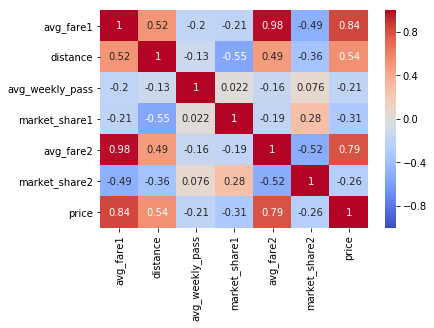

In [30]:
sns.heatmap(airq402[['avg_fare1','distance','avg_weekly_pass','market_share1','avg_fare2','market_share2','price']].corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

Since there is no independent variable with correlation magnitude less than 0.1, we need not drop any variable.

# 5) Create scatter Plot of Independent Variable vs Dependent Variable

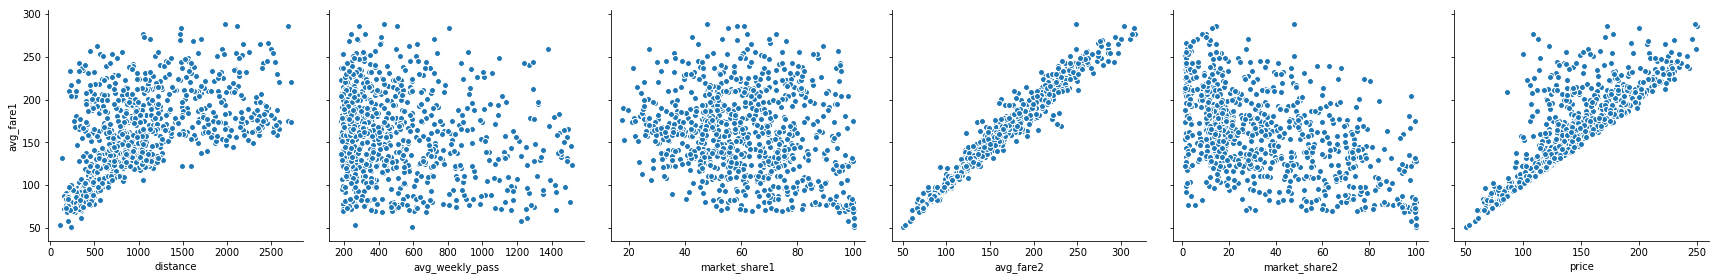

In [31]:
sns.pairplot(airq402,x_vars=['distance','avg_weekly_pass','market_share1','avg_fare2','market_share2','price'],y_vars='avg_fare1',size=4)

# 6) Divide the data set into training and test data set and build a Multiple Linear Regression model.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=100)

**creating an instance of linear regression**

In [33]:
lm = LinearRegression()

**train and fit on training data**

In [34]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 7)Print the coefficients & intercepts of the linear regression model

In [35]:
# The coefficients
print('Coefficients: \n ', lm.coef_)


Coefficients: 
  [[ 0.00307135 -0.00296898  0.09397875  0.72988774 -0.04497465  0.22275428]]


In [36]:
print('Intercept: \n', lm.intercept_)

Intercept: 
 [4.55827001]


In [54]:
#coefficient dataframe
lm.coef_=np.transpose(lm.coef_)
coefficient_df = pd.DataFrame(lm.coef_,X.columns, columns = ["coefficient"])
coefficient_df



,coefficient
distance,0.003071
avg_weekly_pass,-0.002969
market_share1,0.093979
avg_fare2,0.729888
market_share2,-0.044975
price,0.222754


# 8) Print the accuracy of the overall model

**Predicting the test data**

In [37]:
predictions = lm.predict(X_test)
predictions


array([[172.93085103],
       [ 83.88687882],
       [157.3892849 ],
       [ 84.28647583],
       [178.44409317],
       [ 81.84537867],
       [158.27061754],
       [104.07574922],
       [106.22972951],
       [210.77793898],
       [169.59768057],
       [138.95481403],
       [237.21904947],
       [160.92916193],
       [161.91515684],
       [142.05126308],
       [135.73245971],
       [121.74346172],
       [212.8363552 ],
       [159.06643822],
       [151.04295429],
       [ 89.13886426],
       [178.81954553],
       [259.56418111],
       [223.80699859],
       [ 73.80429769],
       [175.04126971],
       [169.20327698],
       [164.13909836],
       [130.84762581],
       [180.71477129],
       [ 92.13701769],
       [182.45665699],
       [164.23884955],
       [ 84.12291166],
       [174.58903839],
       [230.93105154],
       [ 96.55063955],
       [179.40735024],
       [ 79.73782068],
       [175.9805668 ],
       [118.73462695],
       [133.74221717],
       [215

**scatter plot to predict the accuracy of the test data vs predicted values**

Text(0,0.5,'Predicted Y')

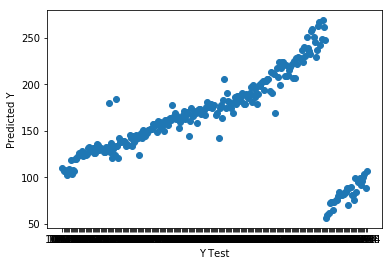

In [38]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test') 
plt.ylabel('Predicted Y')

In [39]:
from sklearn import metrics
r_squared = metrics.r2_score(Y_test,predictions)

r_squared

0.9743695116476749

In [40]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 5.44129780513717
MSE: 59.83398374724258
RMSE: 7.735242966270845


R2 is 97.4% approx. Hence the accuracy is around 97%